In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df = pd.read_csv("house_price.csv")
df.head()



id   Date  number of rooms  number of bathrooms  living area  \
0  6762810635  42491                4                 2.50         2920   
1  6762810998  42491                5                 2.75         2910   
2  6762812605  42491                4                 2.50         3310   
3  6762812919  42491                3                 2.00         2710   
4  6762813105  42491                3                 2.50         2600   

    size  number of floors  waterfront present  number of views  \
0   4000               1.5                   0                0   
1   9480               1.5                   0                0   
2  42998               2.0                   0                0   
3   4500               1.5                   0                0   
4   4750               1.0                   0                0   

   condition of the house  ...  Built Year  Renovation Year  location  \
0                       5  ...        1909                0    122004   
1                       3  ...        1939                0    122004   
2                       3  ...        2001                0    122005   
3                       4  ...        1929                0    122006   
4                       4  ...        1951                0    122007   

   Lattitude  Longitude  living_area_renov  lot_area_renov  \
0    52.8878   -114.470               2470            4000   
1    52.8852   -114.468               2940            6600   
2    52.9532   -114.321               3350           42847   
3    52.9047   -114.485               2060            4500   
4    52.9133   -114.590               2380            4750   

   Number of schools nearby  Distance from the airport    Price  
0                         2                         51  1400000  
1                         1                         53  1200000  
2                         3                         76   838000  
3                         1                         51   805000  
4                         1                         67   790000  

[5 rows x 23 columns]

In [ ]:
print(df.info())
print(df.describe())
print(df.isnull().sum())
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14619 non-null  int64  
 1   Date                                   14619 non-null  int64  
 2   number of rooms                        14619 non-null  int64  
 3   number of bathrooms                    14619 non-null  float64
 4   living area                            14619 non-null  int64  
 5   size                                   14619 non-null  int64  
 6   number of floors                       14619 non-null  float64
 7   waterfront present                     14619 non-null  int64  
 8   number of views                        14619 non-null  int64  
 9   condition of the house                 14619 non-null  int64  
 10  grade of the house                     14619 non-null  int64  
 11  Ar

In [8]:
df = df.dropna()


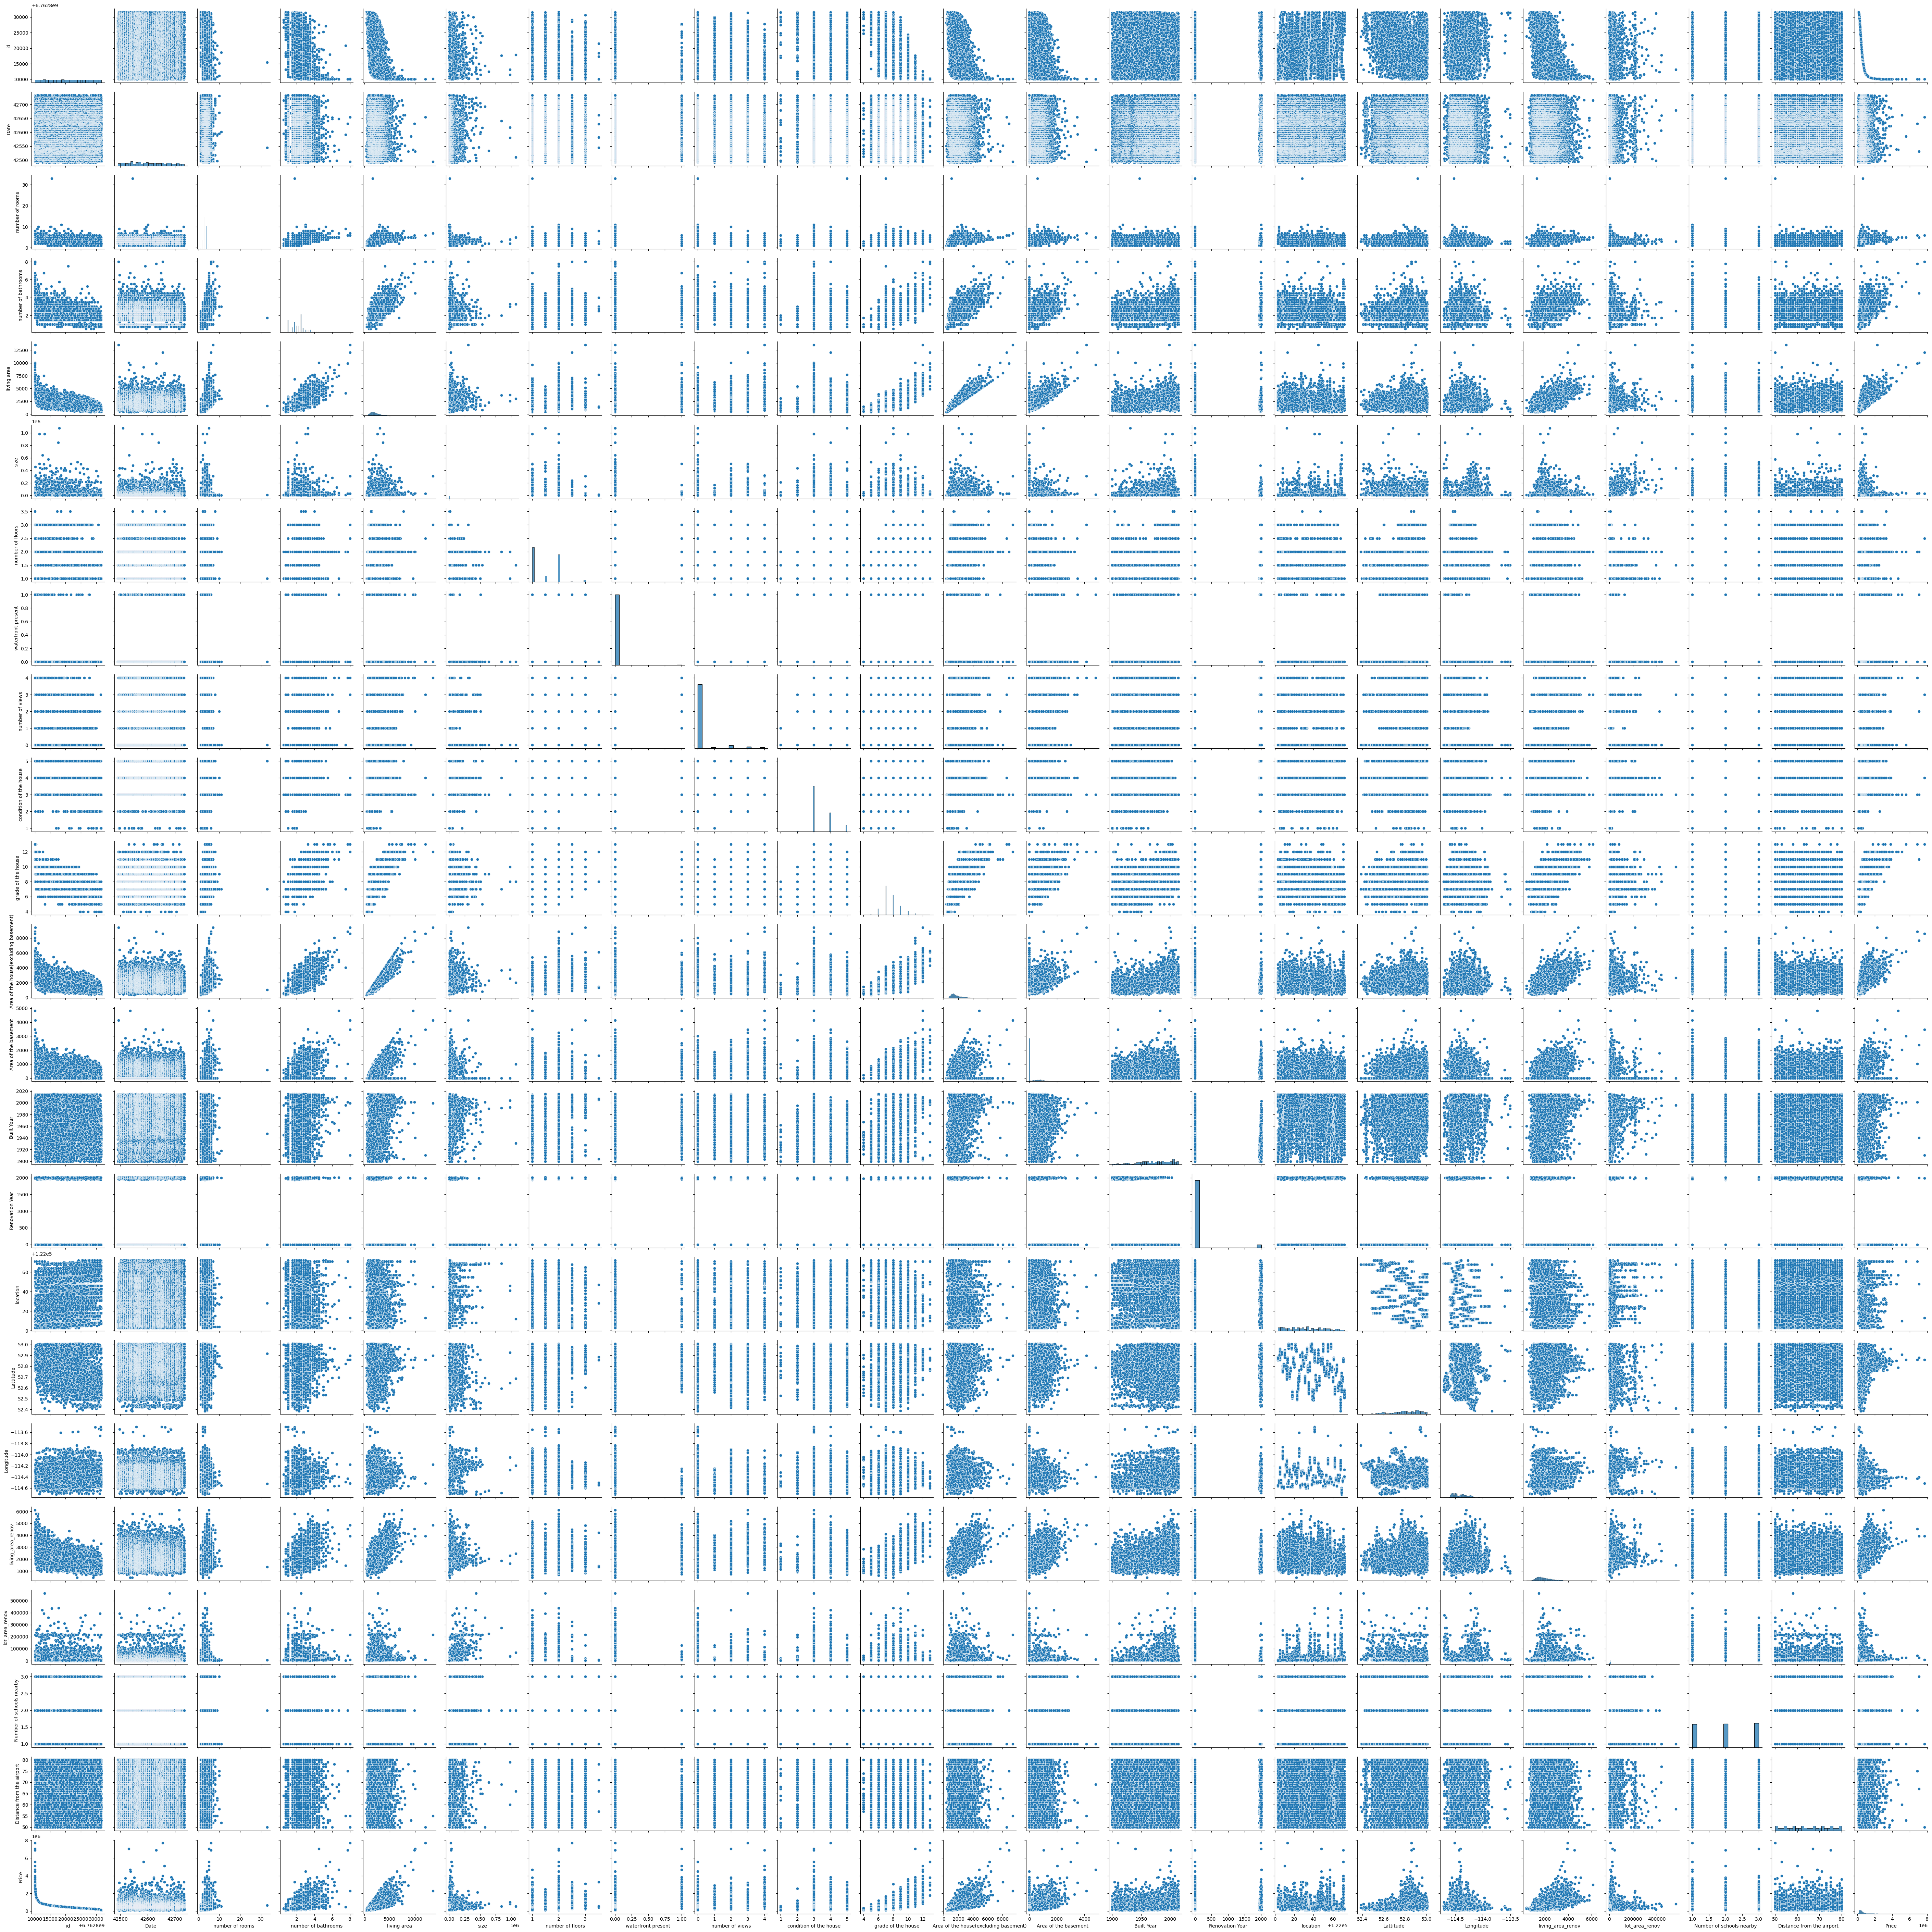

In [9]:
sns.pairplot(df)
plt.show()


In [16]:
numeric_features = ['size', 'number of rooms']
categorical_features = ['location']

scaler = StandardScaler()
encoder = OneHotEncoder()

preprocessor = ColumnTransformer([
    ('num', scaler, numeric_features),
    ('cat', encoder, categorical_features)
])


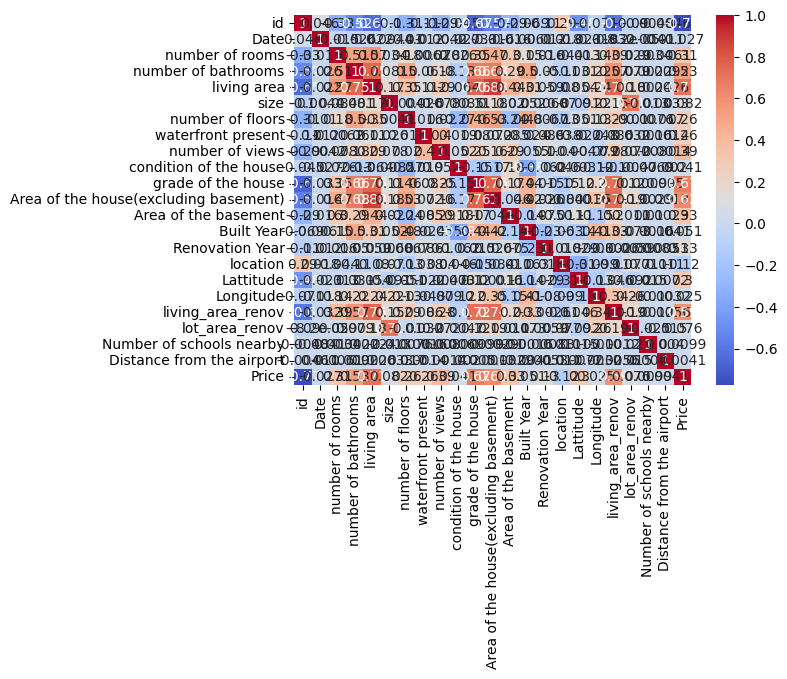

In [17]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()


In [18]:
X = df[['size', 'location', 'number of rooms']]
y = df['Price']


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['size', 'number of rooms']),
                                                 ('cat', OneHotEncoder(),
                                                  ['location'])])),
                ('regressor', LinearRegression())])

In [21]:
y_pred = model.predict(X_test)


In [23]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


RMSE: 271122.0878971407
R² Score: 0.5033166370171748


       Actual      Predicted
7983   546800  660126.570244
6466   550000  624527.898824
10306  399950  373824.910185
1217   940000  659882.975357
12463  545000  504873.929997


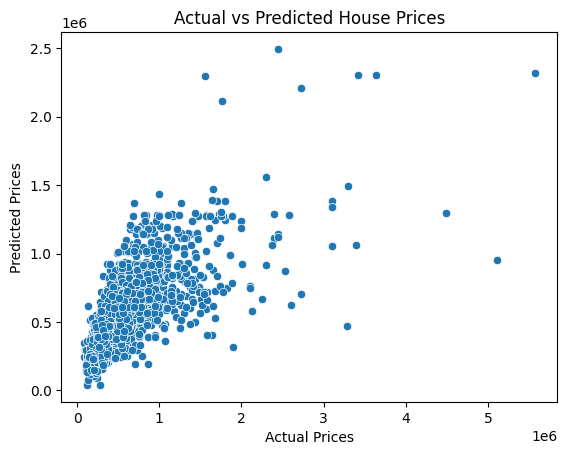

In [22]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())

sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()
